## Federico Canzonieri Matricola 1000024369
## Progetto Multimedia 2020/2021

## Trasformata di Hartley 


Nell'analisi e elaborazione di segnali, immagini viene ampiamente usata la Trasformata di Fourier, nella versione discreta (DFT, una implementazione naive richiede una complessità di $O(n^2)$ (1-D) che è molto dispendioso, tuttavia sono stati svluppati algoritmi per la *FFT* (*Fast Fourier Transform*) di complessita $O(nlog(n))$ che molto più efficenti.
Tuttavia la Trasformata  genera in output numeri complessi anche se in segnale input è reale.

La Trasformata di *Hartley* è una particolare trasformata che mappa valori reali in input su valori reali in output, togliendo la complessità di trattare i numeri complessi.

Viene anche definita la sua versione discreta (DHT), formalmente è definita così:

$$ H(k)=\sum_{n=0}^{N-1}x(n)cas\bigg(\frac{2\pi nk}N\bigg),\space k=0,1,2,.... N-1 $$

e l'anti trasformata
$$ h(n)=\frac{1}{N}\sum_{k=0}^{N-1}X(k)cas\bigg(\frac{2\pi nk}N\bigg),\space n=0,1,2,.... N-1 $$


in cui $$cas(x)=cos(x)+sin(x)$$

In effetti la DHT ricorda la DFT come struttura, infatti ci sono delle proprietà che permettono di passare da uno all'altra:

$$\mathcal{H}f = \Re\{\mathcal{F}f\}-\Im\{\mathcal{F}f\}.$$

La DHT si può ottenere a partire dalla DFT sottraendo le parti reali a quelle immaginarie.

$$\mathcal{Real}\{F_k\} = \frac{1}{2}[H_k+H_{N-k}]$$
$$\mathcal{Imag}\{F_k\} = -\frac{1}{2}[H_k-H_{N-k}]$$
$$ n=0,1, ..., \frac{N}{2}-1 $$


Un'altra proprieta interessante della DHT è l'involuzione, cioè l'antitrasformata è uguale alla trasformata meno che per un fattore di scala.

$$ f=\mathcal{H}\{\mathcal{H}f\} $$

Le relazione presentante prima possono essere scritte in forma matriciale.
La matrice di trasformazione di dimensione $NxN$ è simmetrica.


$$ h_{i,j}=cas\bigg(\frac{2\pi ij}{N}\bigg) $$

$$
H=
\begin{bmatrix}
h_{0,0} & h_{0,1} & ... & h_{0,N-1} \\
h_{1,0} & h_{1,1} & ... & h_{1,N-1} \\
h_{2,0} & h_{2,1} & ... & h_{2,N-1} \\
... & ... & ... & ... \\
h_{N-1,0} & h_{N-1,1} & ... &h_{N-1,N-1} \\
\end{bmatrix}
$$



Per i segnali 1-D possiamo calcolare i coefficenti della trasformata con questa relazione.


$$ A=H*S   $$ 

Antitrasformata

$$ S=H^T*A=H*A $$ 

Esplicitamente

\begin{equation}
\begin{bmatrix}
H_0 \\
H_1 \\
H_2 \\
... \\
H_{N-1} \\
\end{bmatrix}
=
\begin{bmatrix}
1 & 1 & 1 ... & 1\\
1 & cas\bigg(\frac{2\pi}{N}\bigg) & cas\bigg(\frac{4\pi}{N}\bigg) ... & cas\bigg(\frac{2\pi(N-1)}{N}\bigg)\\
1 & cas\bigg(\frac{4\pi}{N}\bigg) & cas\bigg(\frac{6\pi}{N}\bigg) ... & cas\bigg(\frac{4\pi(N-1)}{N}\bigg)\\
... & ... & ... & ... \\
1 & cas\bigg(\frac{2\pi (N-1)}{N}\bigg) & cas\bigg(\frac{4\pi (N-1)}{N}\bigg) ... & cas\bigg(\frac{2\pi (N-1)(N-1)}{N}\bigg)\\
\end{bmatrix} 
\begin{bmatrix}
h_0 \\
h_1 \\
h_2 \\
... \\
h_{N-1} \\
\end{bmatrix}
\end{equation}




Per i segnali 2-D invece possiamo calcolare i coefficenti in questo modo.



$$ A=H*S*H^T=H*S*H    $$ 


$$ S=H*A*H  $$ 

Estendendo la formula iniziale al caso 2-D possiamo dare un'altra formulazione.

$$ H(u,v)=\sum_{x=0}^{N-1}\sum_{y=0}^{N-1} f(x,y)cas\bigg(\frac{2\pi (xu+yv)}N\bigg) $$


$$ f(x,y)=\frac{1}{N^2}\sum_{u=0}^{N-1}\sum_{v=0}^{N-1} H(u,v)cas\bigg(\frac{2\pi (xu+yv)}N\bigg) $$

Purtroppo la sua versione 2-D non è separabile.


Importiamo le librerie necessarie.
<ul>
    <li> numpy  </li>
    <li> matplotlib.pyplot, per la visualizzione dei grafici </li>
    <li> PIL, per delle operazioni sulle immagini </li>
    <li> skimage, per le metriche sulle immagini </li>
    <li> scipy, per la fft (1-D,2-D)</li>
    
</ul>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image,ImageOps
from scipy.fftpack import fftshift,fft2,ifft2,fft,ifft,fftfreq,ifftshift
from scipy.io.wavfile import read,write
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error,peak_signal_noise_ratio

Le implementazioni di DHT e DFT, sfruttando le operazioni vettoriali (più efficente) rispetto ad una banale (meno efficente)

In [2]:
#Hartley Transform Vectorized 
def dht(x):
    x=np.asarray(x,dtype=float)
    N=x.shape[0]
    n=np.arange(N)
    k=n.reshape((N,1))
    M=np.cos(2*np.pi*k*n/N)+np.sin(2*np.pi*k*n/N)
    return np.dot(M,x)

#Fourier Transform Vectorized
def dft(x):
    x=np.asarray(x,dtype=float)
    N=x.shape[0]
    n=np.arange(N)
    k=n.reshape((N,1))
    M=np.exp(-1j*2*np.pi*k*n/N)
    return np.dot(M,x)

#Implentazione Doppio For (Banale) Inefficente
def dft_banale(x_input):
    x_output=np.zeros((x_input.shape),dtype='complex')
    for k in range(0,x_output.shape[0]):
        temp=0
        for n in range(0,x_output.shape[0]):
            temp+=x_input[n]*np.exp(-1j*2*np.pi*k*n/x_output.shape[0]) 
        x_output[k]=temp
    return x_output
#Inefficente
def dht_banale(x_input):
    x_output=np.zeros((x_input.shape),dtype='float64')
    for k in range(0,x_output.shape[0]):
        temp=0
        for n in range(0,x_output.shape[0]):
            temp+=x_input[n]*(np.cos(2*np.pi*k*n/x_output.shape[0])+np.sin(2*np.pi*k*n/x_output.shape[0]))
        x_output[k]=temp
    return x_output



Implementazioni di DHT 2-D e DFT 2-D 

In [3]:
# DFT 2d inefficente
def dft_2D(x_input):
    x_output=np.zeros((x_input.shape) ,dtype='complex')
    print(x_output.shape)
    ## DOPPIO CICLO
    M=x_input.shape[0]
    N=x_input.shape[1]
    for k in range(x_input.shape[0]):
        for l in range(x_input.shape[1]):
            tmp=0
            for m in range(M):
                for n in range(N):
                    tmp+=x_input[m][n]*np.exp(-1j*2*np.pi*(k/M*m+l/N*n))
            x_output[k][l]=tmp
    
    return x_output*1/(M*N)
   
# DHT 2d inefficente
def cas(x): 
    return np.cos(x)+np.sin(x)
    
def dht_2D(x_input):
    x_output=np.zeros((x_input.shape) ,dtype='complex')
    print(x_output.shape)
    ## DOPPIO CICLO
    N=x_input.shape[0]
    M=x_input.shape[1]
    for u in range(x_input.shape[0]):
        for v in range(x_input.shape[1]):
            tmp=0
            for x in range(N):
                for y in range(M):
                    tmp+=x_input[x][y]*cas(2*np.pi*(u*x+v*y)/N)
            x_output[u][v]=tmp
    
    return x_output



#  Discrete Fourier Transform e Discrete Hartley Transform 1-D


Proviamo a vedere se ci sono differenze significative tra la DFT e la DHT nel contesto di elaborazione segnali 1-D.

In particolare verrà usato un segnale audio.

Passi:
<ul>
    <li>Importare il segnale di input, (segnale audio)</li>
    <li>Calcolare la DFT e la DHT, visualizzarne gli spettri</li>
    <li>Applicare un filtro low-pass</li>
    <li>Ricostruire il segnale</li>
    <li>Confrontare il segnale ricostruito con quello originale e analizzare se ci sono differenze tra la DFT e la DHT</li>
</ul>


La formula per calcolare l'errore è $ errore=\frac{\sum|segnale_{orig}-segnale_{ricostruito}  |}{N}  $



Freq camp: 44100 Hz


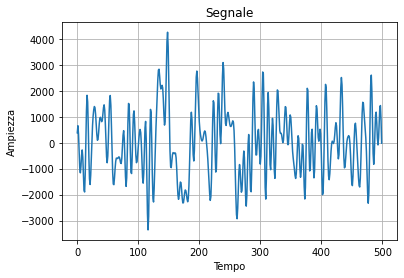

In [4]:
### Manipolazione Audio

sample_freq,data=read("Registrazione.wav")
print("Freq camp:", sample_freq,"Hz")
#Canale L and R
#Prendo solo L e solo 500 campioni
data=data[100000:100500,0]

plt.figure()
plt.plot(data)
plt.grid()
plt.xlabel('Tempo')
plt.ylabel('Ampiezza')
plt.title("Segnale")

plt.show()

Frequenza di taglio: 1764.0  Hz
Errore tra l'originale e quello ricostruito con 20 componenti DFT 529.7228882100235
Errore tra l'originale e quello ricostruito con 20 componenti DHT 639.7785114730135


E:\Conda\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


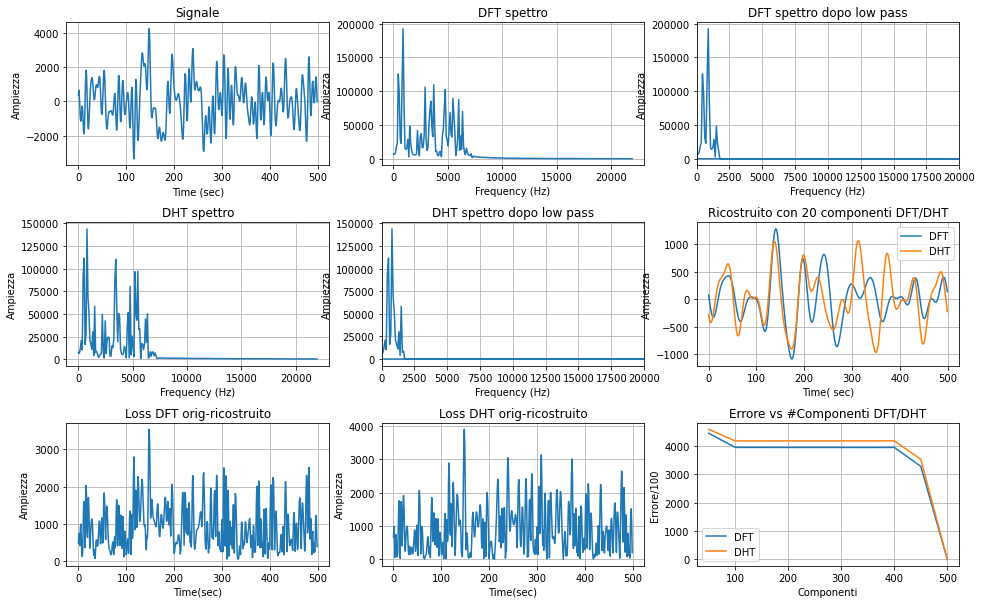

In [5]:
##### Fourier

datafft = fft(data) # Restituisce un numero complesso (parte reale e immaginaria)
fftabs = abs(datafft) # Calcoliamo la magn = sqrt(real+imag)
freqs = fftfreq(data.shape[0],1./sample_freq) ##frequenze

fig,axs=plt.subplots(3,3,figsize=(16,10))
plt.subplots_adjust(hspace=0.4)


axs[0,0].grid()
axs[0,0].set(xlabel='Time (sec)', ylabel='Ampiezza')
axs[0,0].plot(data) # Diviso 2 per freq Nyquist
axs[0,0].set_title("Signale")


axs[0,1].grid()
axs[0,1].set(xlabel='Frequency (Hz)', ylabel='Ampiezza')
axs[0,1].plot(freqs[:int(freqs.size/2.)],fftabs[:int(freqs.size/2.)]) # Diviso 2 per freq Nyquist
axs[0,1].set_title("DFT spettro")


comp=20 ##COMPONENTI PER LA RICOSTRUZIONE

print("Frequenza di taglio:",freqs[comp]," Hz") ##

axs[0,2].grid( True )
axs[0,2].set(xlabel='Frequency (Hz)', ylabel='Ampiezza')
axs[0,2].set_xlim([0,20000])
data_low_pass=fftabs.copy()
data_low_pass[comp:]=0
axs[0,2].plot(freqs,data_low_pass)
axs[0,2].set_title("DFT spettro dopo low pass")


axs[1,2].grid()
axs[1,2].set(xlabel='Time( sec)',ylabel='Ampiezza')
axs[1,2].set_title(f"Ricostruito con {comp} component DFT" )
data_low_pass=datafft.copy()
data_low_pass[comp:]=0
data_reconstruited=ifft(data_low_pass)
axs[1,2].plot(data_reconstruited,label='DFT')
axs[1,2].legend()

##quanto è diverso dal segnale originale
axs[2,0].grid()
axs[2,0].set(xlabel='Time(sec)',ylabel='Ampiezza')
axs[2,0].set_title("Loss DFT orig-ricostruito")
data_low_pass=datafft.copy()
data_low_pass[comp:]=0
data_reconstruited_reduced=ifft(data_low_pass)
axs[2,0].plot(abs(ifft(datafft)-data_reconstruited_reduced))

print(f"Errore tra l'originale e quello ricostruito con {comp} componenti DFT",np.mean(abs(data)-abs(data_reconstruited_reduced)))


error_comp=[]
components=[50,100,150,200,250,300,350,400,450,500]
for component in components:
    data_low_pass=datafft.copy()
    data_low_pass[component:]=0
    data_reconstruited_reduced=ifft(data_low_pass)
    error_comp.append(1/100*np.sum(abs(data-data_reconstruited_reduced)))

#print(error_comp)
#plt.figure()
axs[2,2].grid()
axs[2,2].set(xlabel='Componenti',ylabel='Errore/100')
axs[2,2].set_title('Error vs Num_Componenti DFT')
axs[2,2].plot(components,error_comp,label='DFT')
axs[2,2].legend()


########## Hartley DHT

datahdt=dht(data)
freqs=fftfreq(data.shape[0],1./sample_freq)


axs[1,0].grid()
axs[1,0].set(xlabel='Frequency (Hz)', ylabel='Ampiezza')
axs[1,0].plot(freqs[:int(freqs.size/2.)],abs(datahdt[:int(freqs.size/2.)])) # Diviso 2 per freq Nyquist
axs[1,0].set_title("DHT spettro")



axs[1,1].grid()
axs[1,1].set(xlabel='Frequency (Hz)', ylabel='Ampiezza')
data_low_pass=datahdt.copy()
data_low_pass[comp:]=0
#axs[1,0].plot(freqs[:int(freqs.size/2.)],data_low_pass[:int(freqs.size/2.)]) # Diviso 2 per freq Nyquist
axs[1,1].set_xlim([0,20000])
axs[1,1].plot(freqs,abs(data_low_pass))
axs[1,1].set_title("DHT spettro dopo low pass")


axs[1,2].grid(True)
axs[1,2].set(xlabel='Time( sec)',ylabel='Ampiezza')
axs[1,2].set_title(f"Ricostruito con {comp} componenti DFT/DHT")
data_low_pass=datahdt.copy()
data_low_pass[comp:]=0
data_reconstruited=dht(data_low_pass)/data.shape[0]
axs[1,2].plot(data_reconstruited,label='DHT')
axs[1,2].legend()


##quanto è diverso dal segnale originale
axs[2,1].grid()
axs[2,1].set(xlabel='Time(sec)',ylabel='Ampiezza')
axs[2,1].set_title("Loss DHT orig-ricostruito")
data_low_pass=datahdt.copy()
data_low_pass[comp:]=0
data_reconstruited_reduced=dht(data_low_pass)/data.shape[0]
axs[2,1].plot(abs(data-data_reconstruited_reduced))

print(f"Errore tra l'originale e quello ricostruito con {comp} componenti DHT",np.mean(abs(data)-abs(data_reconstruited_reduced)))

error_comp=[]
for component in components:
    data_low_pass=datahdt.copy()
    data_low_pass[component:]=0
    data_reconstruited_reduced=dht(data_low_pass)/data.shape[0]
    error_comp.append(1/100*np.sum(abs(data-data_reconstruited_reduced)))

#print(error_comp)
#plt.figure()
axs[2,2].grid(True)
axs[2,2].set(xlabel='Componenti',ylabel='Errore/100')
axs[2,2].set_title('Errore vs #Componenti DFT/DHT')
axs[2,2].plot(components,error_comp,label='DHT')
axs[2,2].legend()








Sostanzialmente non ci sono molte differenze tra DFT e DHT, sebbene leggermente la DHT commetta un errore di poco più grande come si evince dall'ultimo grafico,che rappresenta in sull'asse delle x le componenti usate per ricostruire il segnale e sulla y l'errore commesso dal segnale originale.

Proviamo adesso a valutare il tempo di computazione.


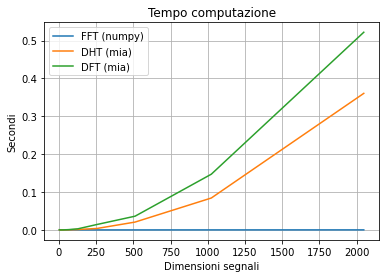

In [6]:
##CONFRONTO TEMPI DI CALCOLO TRA DHT E DFT

time_dft=[]
#time_dft_banale=[] ## fuori scala meglio non considerarla
time_dht=[]
time_fft=[]
time_fht=[]

import timeit
dimensions=[4,8,16,32,64,128,256,512,1024,2048]
for dim in dimensions:
    #DFT
    x=np.arange(dim)
    start = timeit.default_timer()
    dft(x)
    stop = timeit.default_timer()
    time_dft.append(stop-start)
    
    #FFT
    x=np.arange(dim)
    start = timeit.default_timer()
    fft(x)
    stop = timeit.default_timer()
    time_fft.append(stop-start)

    #DHT
    x=np.arange(dim)
    start = timeit.default_timer()
    dht(x)
    stop = timeit.default_timer()
    time_dht.append(stop-start)
    
    #DFT BANALE
    #x=np.arange(dim)
    #start = timeit.default_timer()
    #dft_banale(x)
    #stop = timeit.default_timer()
    #time_dft_banale.append(stop-start)
    
plt.grid()
plt.plot(dimensions,time_fft,label='FFT (numpy)')
plt.plot(dimensions,time_dht,label='DHT (mia)')
plt.plot(dimensions,time_dft,label='DFT (mia)')
#plt.plot(dimensions,time_dft_banale,label='DFT BANALE')
plt.title("Tempo computazione")
plt.xlabel('Dimensioni segnali')
plt.ylabel('Secondi')
plt.legend()

Come si può vedere dal grafico la sia la DHT risulta più veloci della DFT, tuttavia la FFT (numpy) è molto piu efficente di tutte le altre questo perchè sarà stata altamente ottimizzata.

Vediamo la differenza tra i segnali ricostruiti

Grafichiamo come cambiano i segnali ricostruiti con un certo numero di componenti


Text(0.5, 1.0, 'Segnale ricostruito componenti DHT')

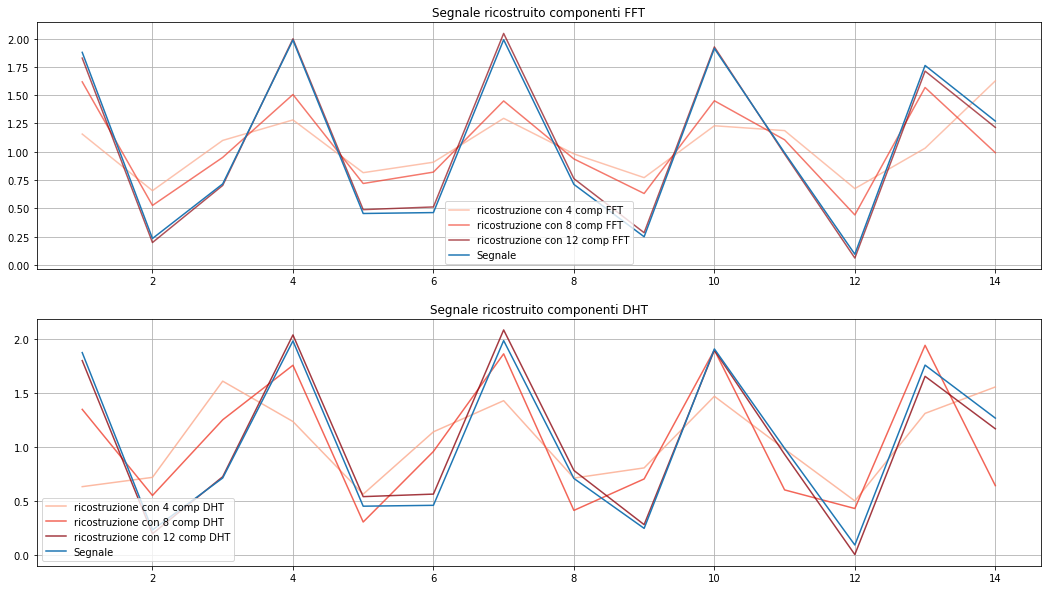

In [7]:
## DFT e DHT componenti

import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
x=np.arange(1,15) 
y=np.sin(x*2)+np.cos(1/(x*3+1)) ##SEGNALE

n = len(y)
COMPONENTS = [14] ## FINO A 14 COMPONENTI PER LA RICOSTRUZIONE
#plt.figure(figsize=(18,10))

fig,axs=plt.subplots(2,1,figsize=(18,10))

for c in COMPONENTS:
    colors = np.linspace(start=0, stop=255, num=c)
    fft_comp=[]
    dht_comp=[]
    for i in range(4,c,4): ## PRIME 4 COMPONENTI, 8 - 12 - 16 ...
        ##DFT
        Y = fft(y)
        ##ricostruisco usando 'i' componenti 
        np.put(Y, range(i+1, n), 0.0)
        ifft_ = np.fft.ifft(Y)
        fft_comp.append(ifft_)
        axs[0].plot(x, ifft_, color=plt.cm.Reds(int(colors[i])), alpha=.70,label="ricostruzione con "+str(i)+" comp FFT")
        #plt.plot(x, ifft_, color=plt.cm.Reds(int(colors[i])), alpha=.70,label=str(i)+"com")
        
        ##DHT
        Y = dht(y)
        ##ricostruisco usando 'i' componenti 
        np.put(Y, range(i+1, n), 0.0)
        idht_ = dht(Y)*1/len(Y)
        dht_comp.append(idht_)
        axs[1].plot(x, idht_, color=plt.cm.Reds(int(colors[i])), alpha=.80,label="ricostruzione con "+str(i)+" comp DHT")
        #plt.plot(x, idht_, color=plt.cm.Blues(int(colors[i])), alpha=.70,label=str(i)+"com")

axs[0].grid()
axs[1].grid()
axs[0].plot(x,y,label='Segnale')
axs[1].plot(x,y,label='Segnale')
axs[0].legend()
axs[1].legend()
axs[0].set_title(f'Segnale ricostruito componenti FFT')
axs[1].set_title(f'Segnale ricostruito componenti DHT')



### 0 comp?



## Discrete Fourier Transform e Discrete Hartley Transform 2-D

Adesso proviamo a confrontare le due trasformate su delle immagini.

Come per i segnali 1-D.

Passi:
<ul>
    <li>Importare l'immagine (lena)  </li>
    <li>Calcolare la DFT e DHT 2-D  </li>
    <li>Mostrare gli spettri/fase per la DFT e DHT 2-D  </li>
    <li>Applicare un filtro low-pass  </li>
    <li>Ricostruire l'immagine </li>
    <li> Vedere se ci sono differenze tra  l'immagine e quella ricostruita per la DFT e DHT </li>
    
</ul>



Mostriamo le basi per la DHT e per la DFT.

Text(0.5, 1.0, 'Hartley Base Shiftata')

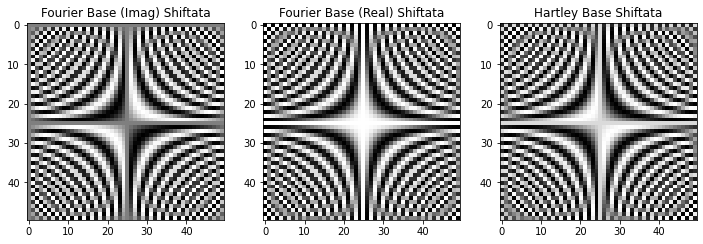

In [8]:
def H_Matrix(n):
    a = np.zeros ( ( n, n ) )
    for i in range ( 0, n ):
        for j in range ( 0, n ):
            angle = 2.0 * np.pi *  i * j  /  n 
            a[i,j] = np.sin ( angle ) + np.cos ( angle )
    return a

def U_Matrix(n):
    a = np.zeros ( ( n, n ),dtype=np.complex64 )
    for i in range ( 0, n ):
        for j in range ( 0, n ):
            angle = 2.0 * np.pi *  i * j  /  n 
            a[i,j] = np.exp(-1j*angle)
    return a

fig,basis=plt.subplots(1,3,figsize=(12,10))
basis[0].imshow(fftshift((U_Matrix(50).imag)),cmap='gray')
basis[0].set_title("Fourier Base (Imag) Shiftata")

basis[1].imshow(fftshift((U_Matrix(50).real)),cmap='gray')
basis[1].set_title("Fourier Base (Real) Shiftata")

basis[2].imshow(fftshift(H_Matrix(50)),cmap='gray')
basis[2].set_title("Hartley Base Shiftata")


Le matrici di trasformazione DFT e DHT sono molto simili.

Text(0.5, 1.0, 'Lena')

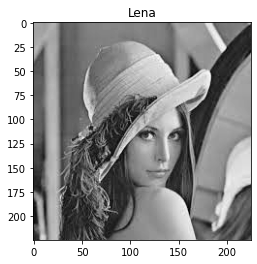

In [9]:
lena = Image.open('lena.jpg')
lena_grayscale=ImageOps.grayscale(lena)
lena_grayscale_array=np.array(lena_grayscale) ##array numpy
plt.imshow(lena_grayscale_array,cmap='gray')
plt.title("Lena")
#print(lena_grayscale_array.dtype)

Metriche su DFT
MSE 365.75902012830187
PSNR 22.498853156299795
SSIM 0.5841411955474597


Metriche su DHT
MSE 365.7590201283025
PSNR 22.498853156299788
SSIM 0.5841411955474591


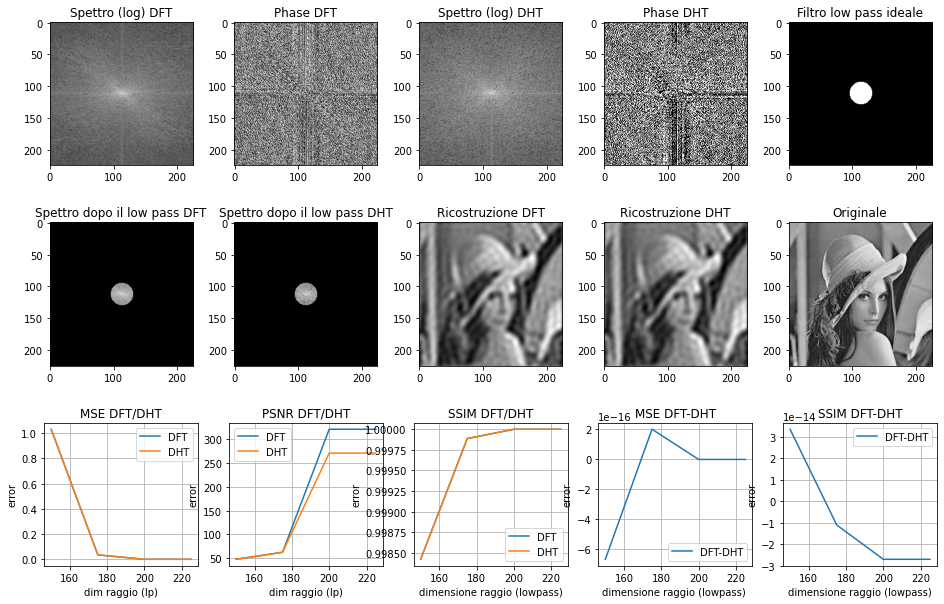

In [10]:
##### 2-D Adesso

### Trasf Fourier su un immagine(lena), filtro low-pass, ricostruzione, errori
freqs_dft=fft2(lena_grayscale_array)


#Mostriamo lo spettro e la fase
fig,axs=plt.subplots(3,5,figsize=(16,10))
plt.subplots_adjust(hspace=0.4)

axs[0,0].imshow(fftshift(20*np.log(np.abs(freqs_dft)+1)),cmap='gray') ## SPECTRUM SHIFTATO
axs[0,0].set_title("Spettro (log) DFT")

axs[0,1].imshow(np.angle(fftshift(freqs_dft)),cmap='gray')              ## PHASE SHIFTATO
axs[0,1].set_title("Phase DFT")


num_points=256
raggio=20

tpa1=np.linspace(0,num_points,lena_grayscale_array.shape[0])
tpa2=np.linspace(0,num_points,lena_grayscale_array.shape[1])

[X,Y] = np.meshgrid(tpa2,tpa1);
lowpfilter = (np.sqrt((X-num_points/2)**2+(Y-num_points/2)**2)<=raggio)*1 ### filtro ideale low pass raggio 60
axs[0,4].imshow(lowpfilter,cmap='gray')
axs[0,4].set_title('Filtro low pass ideale')

freqs_after_low_pass=np.multiply(fftshift(freqs_dft),lowpfilter)
axs[1,0].imshow((20*np.log(np.abs(freqs_after_low_pass)+1)),cmap='gray')
axs[1,0].set_title("Spettro dopo il low pass DFT")

axs[1,2].imshow(ifft2(ifftshift(freqs_after_low_pass)).real,cmap='gray')
axs[1,2].set_title('Ricostruzione DFT')

axs[1,1].imshow(ifft2(freqs_dft).real,cmap='gray')
axs[1,1].set_title('Originale')

print("Metriche su DFT")
print(f"MSE {mean_squared_error(lena_grayscale_array,ifft2(ifftshift(freqs_after_low_pass)))}")
print(f"PSNR {peak_signal_noise_ratio(lena_grayscale_array,ifft2(ifftshift(freqs_after_low_pass)))}")
print(f"SSIM {ssim(lena_grayscale_array,ifft2(ifftshift(freqs_after_low_pass)))}")

radius=[150,175,200,225]
error_mse_dft=[]
error_psnr_dft=[]
error_ssim_dft=[]

for rads in radius:
    lowpfilter = (np.sqrt((X-num_points/2)**2+(Y-num_points/2)**2)<=rads)*1 ### filtro ideale low pass raggio 60
    freqs_after_low_pass=np.multiply(fftshift(freqs_dft),lowpfilter)
    recon=ifft2(ifftshift(freqs_after_low_pass))
    error_mse_dft.append(mean_squared_error(lena_grayscale_array,recon))
    error_psnr_dft.append(peak_signal_noise_ratio(lena_grayscale_array,recon))
    error_ssim_dft.append(ssim(lena_grayscale_array,recon))

axs[2,0].grid()
axs[2,0].plot(radius,error_mse_dft,label='DFT')
axs[2,0].set(xlabel='dim raggio (lp)',ylabel='error')
axs[2,0].set_title('MSE DFT')

axs[2,1].grid()
axs[2,1].plot(radius,error_psnr_dft,label='DFT')
axs[2,1].set(xlabel='dim raggio (lp)',ylabel='error')
axs[2,1].set_title('PSNR DFT')

axs[2,2].grid()
axs[2,2].plot(radius,error_ssim_dft,label='DFT')
axs[2,2].set(xlabel='dim raggio (lp)',ylabel='error')
axs[2,2].set_title('SSIM DFT')


###DHT
H_m=H_Matrix(225) ### MATRIX TRANSFORM
freqs_dht=np.dot(H_m,np.dot(lena_grayscale_array,H_m)) ##DHT


axs[0,2].imshow(fftshift(np.log(np.abs(freqs_dht)+1)),cmap='gray') ## SPECTRUM SHIFTATO
axs[0,2].set_title("Spettro (log) DHT")

axs[0,3].imshow(np.angle(fftshift(freqs_dht)),cmap='gray')   ## PHASE SHIFTATO
axs[0,3].set_title("Phase DHT")


tpa1=np.linspace(0,num_points,lena_grayscale_array.shape[0])
tpa2=np.linspace(0,num_points,lena_grayscale_array.shape[1])


[X,Y] = np.meshgrid(tpa2,tpa1);
lowpfilter = (np.sqrt((X-num_points/2)**2+(Y-num_points/2)**2)<=raggio)*1 ### filtro ideale low pass raggio 60


freqs_after_low_pass=np.multiply(fftshift(freqs_dht),lowpfilter)
axs[1,1].imshow((np.log(np.abs(freqs_after_low_pass)+1)),cmap='gray')
axs[1,1].set_title("Spettro dopo il low pass DHT")

##ifftshift
reconstruited=np.dot(1/225*H_m,np.dot(ifftshift(freqs_after_low_pass),H_m*1/225))
axs[1,3].imshow(reconstruited.real,cmap='gray')
axs[1,3].set_title('Ricostruzione DHT')


axs[1,4].imshow(lena_grayscale_array,cmap='gray')
axs[1,4].set_title('Originale')


print("\n\nMetriche su DHT")
print(f"MSE {mean_squared_error(lena_grayscale_array,(reconstruited.real))}")
print(f"PSNR {peak_signal_noise_ratio(lena_grayscale_array,(reconstruited.real))}")
print(f"SSIM {ssim(lena_grayscale_array,(reconstruited.real))}")

error_mse_dht=[]
error_psnr_dht=[]
error_ssim_dht=[]

for rads in radius:
    lowpfilter = (np.sqrt((X-num_points/2)**2+(Y-num_points/2)**2)<=rads)*1 ### filtro ideale low pass raggio 60
    freqs_after_low_pass=np.multiply(fftshift(freqs_dht),lowpfilter)
    recon=np.dot(H_m*1/225,np.dot(ifftshift(freqs_after_low_pass),H_m*1/225)).real
    error_mse_dht.append(mean_squared_error(lena_grayscale_array,recon))
    error_psnr_dht.append(peak_signal_noise_ratio(lena_grayscale_array,recon))
    error_ssim_dht.append(ssim(lena_grayscale_array,recon))


axs[2,0].grid(True)
axs[2,0].plot(radius,error_mse_dht,label='DHT')
axs[2,0].set(xlabel='dim raggio (lp)',ylabel='error')
axs[2,0].set_title('MSE DFT/DHT')
axs[2,0].legend()

axs[2,1].grid(True)
axs[2,1].plot(radius,error_psnr_dht,label='DHT')
axs[2,1].set(xlabel='dim raggio (lp)',ylabel='error')
axs[2,1].set_title('PSNR DFT/DHT')
axs[2,1].legend()


axs[2,2].grid(True)
axs[2,2].plot(radius,error_ssim_dht,label='DHT')
axs[2,2].set(xlabel='dimensione raggio (lowpass)',ylabel='error')
axs[2,2].set_title('SSIM DFT/DHT')
axs[2,2].legend()

# DFT - DHT
axs[2,3].grid(True)
axs[2,3].plot(radius,np.array(error_mse_dft)-np.array(error_mse_dht),label='DFT-DHT')
axs[2,3].set(xlabel='dimensione raggio (lowpass) ',ylabel='error')
axs[2,3].set_title('MSE DFT-DHT')
axs[2,3].legend()


#DFT - DHT
axs[2,4].grid(True)
axs[2,4].plot(radius,np.array(error_ssim_dft)-np.array(error_ssim_dht),label='DFT-DHT')
axs[2,4].set(xlabel='dimensione raggio (lowpass)',ylabel='error')
axs[2,4].set_title('SSIM DFT-DHT')
axs[2,4].legend()



#print(error_psnr_dft)
#print(error_psnr_dht)


### Differenze tra DHT e DFT

Vengono calcolate le metriche PSNR,MSE,SSIM con l'immagine originale e quella ricostruita, sostanzialmente non ci sono grosse differenze (differenza pressocche nulla, come si vede dagli ultimi due grafici) tranne per il PSNR.



Proviamo a vedere se ci sono differenze tra i tempi di computazione

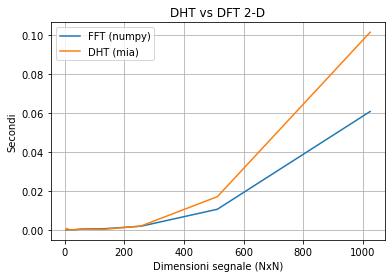

In [11]:
### PLOT TIME Vs DIM

time_dft=[]
#time_dft_banale=[]
time_dht=[]
time_fft=[]
time_fht=[]

import timeit
dimensions=[4,8,16,32,64,128,256,512,1024] #SEGNALI 4x4,8x8,16x16, .. ..
for dim in dimensions:
    
    #DHT
    x=np.random.random((dim,dim))
    H=H_Matrix(dim) ### LA ESCLUDO DAL CALCOLO 
    start = timeit.default_timer()
    np.dot(H,np.dot(x,H))
    stop = timeit.default_timer()
    time_dht.append(stop-start)
    
    #FFT
    x=np.random.random((dim,dim))
    start = timeit.default_timer()
    fft2(x)
    stop = timeit.default_timer()
    time_fft.append(stop-start)

    
plt.grid()
plt.plot(dimensions,time_fft,label='FFT (numpy)')
plt.plot(dimensions,time_dht,label='DHT (mia)')
plt.title("DHT vs DFT 2-D")
plt.xlabel('Dimensioni segnale (NxN)')
plt.ylabel('Secondi')
plt.legend()


Anche in questo caso la FFT di numpy è superiore anche se non di moltissimo, tuttavia il tempo per calcolare la matrice di trasformazione H (per la DHT) non è preso in considerazione.

## Applicazione della DHT alla steganografia/watermarking


Presentiamo ora una applicazione della DHT alla steganografia/watermarking.
La steganografia è un metodo con la quale si nasconde un messaggio dentro un altro per evitare che venga facilmente riconosciuto, ad esempio come vedremo nascondere un'immagine dentro un'altra.

Ovviamente chi invia un messaggio steganografico deve anche dare al ricevente un modo per ottenere il messaggio nascosto.


Passi per la marcatura del messaggio:
<ul>
    <li>Importare l'immagine-messaggio e l'immagine "normale"</li>
    <li>Applicare la DHT all'immagine normale </li>
    <li> Unire la DHT e l'immagine messaggio con un certo coefficente di trasparenza </li>
    <li> Tornare al dominio spaziale </li>
    
</ul>
Passi per l'estrazione del messaggio:
<ul>
    <li>Avere l'immaggine normale e l'immagine "marcata"
    <li>Applicare la DHT all'immagine "marcata" e normale  </li>
    <li> Separa la DHT dell'immagine marcata e normale  </li>
    <li> Ritornare il messaggio-steganografico </li>
    
</ul>



Formula usata per il marking

$$ img\_freq_{watermarked}=img_\_freq+\alpha*watermark $$ 

dove $img_\_freq$ è la DHT dell'immagine, $\alpha $ è un parametro di trasparenza, $ watermark $ è il messaggio che si deve nascondere.


Formula usata per l'estrazione
$$ \frac{img\_freq_{watermarked}-img_\_freq}{\alpha}=watermark $$ 


Ovviamente non è metodo particolarmente robusto.



In [1]:
message = Image.open('download.png')
message=ImageOps.grayscale(message)
message_array=np.array(message).astype(np.int16) ##array numpy
plt.imshow(message_array,cmap='gray') ## messaggio/watermark da nascondere
#print(message_array.dtype)

NameError: name 'Image' is not defined

Text(0.5, 1.0, 'Messaggio segreto')

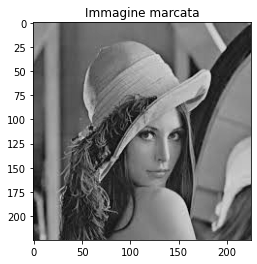

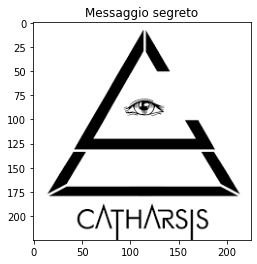

In [13]:

def encode(img, wm_path,  X_,alpha=0.5,):
    
    img_f = np.dot(X_,np.dot(img,X_)) ## DHT
    watermark = wm_path ## watermark
    res_f = img_f + alpha * watermark
    res = np.dot(X_*1/225,np.dot(res_f,X_*1/225))
    #print(watermark)
    res = np.real(res) ## la parte complessa è tutta 0 

    return res

def decode(original, img,X_,alpha=0.5,):
    ori = original
    img = img
    ori_f = np.dot(X_,np.dot(ori,X_)) ##dht original
    img_f = np.dot(X_,np.dot(img,X_)) ## dht img_watermarked
    #height, width = i.shape[0], ori.shape[1]
    watermark = ((img_f-ori_f) / alpha)
    #print(watermark)
    
    return watermark



res=encode(lena_grayscale_array,message_array,H_Matrix(225))
plt.imshow(res,cmap='gray')
plt.title("Immagine marcata")
plt.figure()
ress=decode(lena_grayscale_array,res,H_Matrix(225))
plt.imshow(ress,cmap='gray')
plt.title('Messaggio segreto')

Presentiamo ora un altro metodo steganografico sfruttando i bitplanes. 

Passi per la marcatura:
<ul>
    <li>Importare l'immagine "normale" e messaggio </li>
    <li>Applicare la DHT all'immagine "normale",  </li>
    <li>Effettuare la scomposizione in bitplanes della DHT dell'immagine "normale" e del messaggio </li>
    <li> Sostituire l'i-bitplane della DHT dell'immagine "normale" con l'i-bitplane del messaggio  </li>
    <li> Ritorno al dominio spaziale </li>
</ul>


Passi per l'estrazione:
<ul>
    <li>Applicare la DHT all'immagine "marcata",  </li>
    <li>Effettuare la scomposizione in bitplanes dell'immagine "marcata" </li>
    <li> Estrapolare l'i-bitplane dell'immagine  </li>
    <li> Ritornare il messaggio </li>
</ul>

Nella decodifica non è necessario avere l'immaggine non marcata, ma è necessario sapere su quale bitplane è stato immesso il messaggio.



Text(0.5, 1.0, 'Mess nascosto')

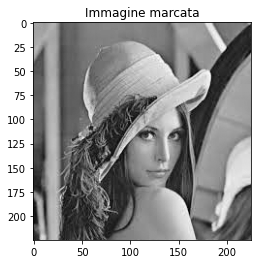

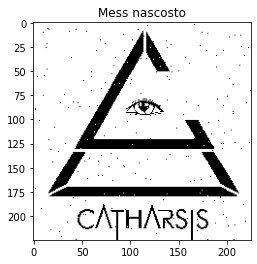

In [14]:
## Bit planes

message_array


def bitplanes(img,width_,dtype_):
    lst = []
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
             lst.append(np.binary_repr(img[i][j] ,width=width_)) # width = no. of bits
                
    
    bitplanes_=np.zeros((img.shape[0],img.shape[1],width_),dtype=dtype_)##dtype explicit?
    #return np.unpackbits(img).reshape(width_)
    for i in range(0,width_):
        
        bitplanes_[:,:,i]=(np.array([int(bi[-i-1]) for bi in lst],dtype = dtype_) *(2**(i))).reshape(img.shape[0],img.shape[1])

    return bitplanes_



def merge_bitplane(img,width,dtype_):
    tmp=np.zeros((img.shape[0],img.shape[1]),dtype=dtype_)
    for i in range(0,width):
        tmp+=img[:,:,i]
    return tmp


def mark_image(image,watermark):

    
    X_=H_Matrix(225)
    img_f = np.dot(X_,np.dot(image,X_)) ## spectrum
    img_f=img_f.astype(np.int64)                       ## convert to int64

    #plt.figure()
    #plt.imshow(np.log(abs(img_f)+1),cmap='gray')

    C=bitplanes(img_f,64,np.int64) ### bitplanes
    #D=C.copy()                     ### copy

    liv=7 ## bitplane scelto
    C[:,:,liv]=bitplanes(message_array,64,np.int64)[:,:,liv]
    
    #spectrum_merged_watermark=merge_bitplane(C,64,np.int64)
    #plt.figure()
    #plt.imshow(np.log(1+abs(spectrum_merged_watermark)),cmap='gray')
    #plt.title("Spettro watermarked")

    #plt.figure()
    #plt.imshow(bitplanes(message_array,64,np.int64)[:,:,0],cmap='gray')

    #plt.figure()
    #extr=merge_bitplane(C,64,np.int64)-merge_bitplane(D,64,np.int64)
    extr=merge_bitplane(C,64,np.int64) ## ricombino i bitplanes!
    #plt.imshow(bitplanes(extr,64,np.int64)[:,:,0],cmap='gray') ### immagine watermarked!!

    #plt.figure()
    lena_watermarked=np.dot(X_*1/225,np.dot(extr,X_*1/225))
    #plt.imshow(lena_watermarked,cmap='gray')

    return lena_watermarked
    #plt.figure()
    #lena_watermarked=np.dot(X_*1/225,np.dot(extr,X_*1/225))
    #plt.imshow(lena_grayscale_array-lena_watermarked,cmap='gray')


def extract_watermark(img_watermark):
    
    liv=7
    #plt.figure()
    X_=H_Matrix(img_watermark.shape[0])
    img_water = np.dot(X_,np.dot(img_watermark,X_))
    #plt.imshow(np.log(abs(img_water)+1),cmap='gray')

    #img_water=img_water+0.00001
    img_water=img_water.astype(np.int64)
    #plt.figure()
    B=bitplanes(img_water,64,np.int64)[:,:,liv]
    #plt.imshow(B,cmap='gray')
    
    return B
    
    
lena_watermarked=mark_image(lena_grayscale_array,message_array)
plt.imshow(lena_watermarked,cmap='gray')
plt.title("Immagine marcata")
plt.figure()
plt.imshow(extract_watermark(lena_watermarked),cmap='gray')
plt.title("Mess nascosto")

La qualità finale del messaggio non è perfetta (è leggermente rumorosa), ma ciò è dovuta alla perdita di precisione nella conversione da *float* a *int*

# FAST HARTLEY TRANSFORM

Come detto all'inizio gli algoritmi per la DHT hanno complessità $O(n^2) $, per n sufficentemente grande cio non è sostenibile. Invece si utilizzano algoritmi *Fast* per ridurre tale complessità a $O(nlog(n)) $.

Presentiamo ora una algoritmo per la Fast Hartley Transform (FHT) usando l'approccio *Radix-2*, consideriamo un segnale in input $x_n $ con $ n=0,1,2,.., N-1 $ con $N=2^p $. 

Possiamo decomporre il segnale in 2 parti, quella con le componenti di indice pari e quella con le componenti di indice dispari.


$$ y_n=x_{2n} $$

$$ z_n=x_{2n+1} $$ 

$$ n=0,1,2,.., \frac{N}{2}-1 $$

Possiamo scrivere la DHT per queste 2 sequenze

$$Y_k=\sum_{n=0}^{\frac{N}{2}-1}y_n cas\bigg(\frac{4\pi n k}{N}\bigg) $$

$$Z_k=\sum_{n=0}^{\frac{N}{2}-1}z_n cas\bigg(\frac{4\pi n k}{N}\bigg) $$

$$k=0,1,..., \frac{N}{2}-1 $$

Ricordando la DHT iniziale

$$X_k=\sum_{n=0}^{N-1} x_n\bigg[cos\bigg(\frac{2\pi n k}{N}\bigg)+sin\bigg(\frac{2\pi n k}{N}\bigg)\bigg]  $$

$$X_K=\sum_{n=0}^{\frac{N}{2}-1} y_n cas\bigg(\frac{4\pi nk}{N}\bigg)+ \sum_{n=0}^{\frac{N}{2}-1} z_n\bigg[cos\bigg(\frac{4 \pi nk }{N}+\frac{2\pi k}{N}\bigg) + sin\bigg(\frac{4 \pi nk }{N}+\frac{2 \pi k}{N}\bigg)\bigg] $$

con qualche altra manipolazione algebrica arriviamo a

$$ X_k=Y_k +\bigg[cos\bigg(\frac{2\pi k}{N}\bigg)Z_k +sin\bigg(\frac{2 \pi k}{N}\bigg)Z_{n-k} \bigg]$$

$$ X_{k+\frac{N}{2}}=Y_k -\bigg[cos\bigg(\frac{2\pi k}{N}\bigg)Z_k +sin\bigg(\frac{2 \pi k}{N}\bigg)Z_{n-k} \bigg]$$

Le ultime 2 equazioni rappresentano la FHT (Radix-2), l'idea di base è quella di decomporre ricorsivamente la sequenza iniziale in 2 sequenze più piccole fino a che non si arriva al caso base di 1 solo elemento e per poi ricomporre la sequenza pù grande.

L'algoritmo per la FFT è molto simile 

$$X_k=Y_k+W^kZ_k $$

$$X_{k+\frac{N}{2}}=Y_k-W^kZ_k $$

$$ W^k=e^{-j\frac{2\pi k}{N}} $$

Notiamo che la FHT richiede solo 2 moltiplicazioni e 3 addizioni tra *reali*, mentre la FFT richiede 1 moltiplicazione complessa e 2 addizioni complesse.
Inoltre per il *radix-2* sia la FHT che la FFT richiedono lo stesso numero di *butterfly* (operazione computazionale per combinare risultati più piccoli per risolvere quelli più grandi).



La complessità di entrambi è $O(nlogn) $, in generale esistono anche algoritmi più sofisticati *Radix-4*,*Radix-8*,*Radix-2/4/8* la cui complessità è sempre dell'ordine $O(nlogn) $.




[ 523776.         -167397.53000842  -83953.97960358 ...   55115.11373067
   82929.97960363  166373.53000843]
[ 523776.         -167397.53000842  -83953.97960358 ...   55115.11373064
   82929.97960358  166373.53000842]


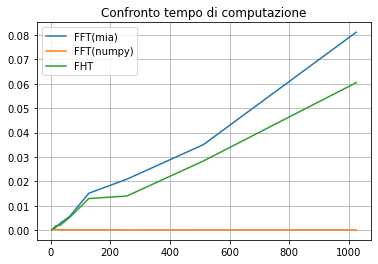

In [28]:
def FFT(f):
    N=len(f)
    if N<=1:
        return f
    even=FFT(f[0::2])
    odd=FFT(f[1::2])
    temp=np.zeros(N).astype(np.complex64)  
    for u in range(N//2):
        temp[u]=even[u]+np.exp(-2j*np.pi*u/N)*odd[u]
        temp[u+N//2]=even[u]-np.exp(-2j*np.pi*u/N)*odd[u]    
    return temp

def FHT(f):
    N=len(f)
    if N<=1:
        return f
    even=FHT(f[0::2])
    odd=FHT(f[1::2])
    temp=np.zeros(N).astype(np.float64)  
    #N=N-1
    for k in range(0,N//2):    
        temp[k]= even[k]+(np.cos(2*np.pi*k/N)*odd[k]+odd[-k]*np.sin(2*np.pi*k/N))    
        temp[k+N//2]= even[k]-(np.cos(2*np.pi/N*k)*odd[k]+np.sin(2*np.pi/N*k)*odd[-k])
    
    return temp
##CONFRONTO TRA FHT FFT(MIA) FFT NUMPY
dimension=[4,8,16,32,64,128,256,512,1024]
time_fft_mia=[]
time_fht_mia=[]
time_fft_numpy=[]
for dim in dimension:
    
    x=np.arange(dim)
    
    start = timeit.default_timer()
    FFT(x)
    stop = timeit.default_timer()
    time_fft_mia.append(stop-start)
    
    start = timeit.default_timer()
    fft(x)
    stop = timeit.default_timer()
    time_fft_numpy.append(stop-start)
    
    start = timeit.default_timer()
    FHT(x)
    stop = timeit.default_timer()
    time_fht_mia.append(stop-start)


#print(time_fft_mia) 
#print(dimension)
plt.plot(dimension,time_fft_mia,label="FFT(mia)")
plt.plot(dimension,time_fft_numpy,label="FFT(numpy)")
plt.plot(dimension,time_fht_mia,label="FHT")
plt.legend()
plt.grid(True)
plt.title("Confronto tempo di computazione")

print(dht(x))
print(FHT(x))


La FFT(numpy) risulta sempre la  più efficente, mentre la FHT è più efficente della FFT(mia).

In [16]:
x=np.arange(16)

F=fft(x)
print("DFT -> DHT ")
print("Differenza tra parte reale e immaginaria",F.real-F.imag)
print(dht(x))

print("DHT -> DFT")
B=dht(x)
print(F[2])
print("Reale",0.5*(B[-2]+B[2]))
print("Immaginaria ",0.5*(B[-2]-B[2]))




DFT -> DHT 
Differenza tra parte reale e immaginaria [120.         -48.21871594 -27.3137085  -19.9728461  -16.
 -13.3454291  -11.3137085   -9.59129894  -8.          -6.40870106
  -4.6862915   -2.6545709    0.           3.9728461   11.3137085
  32.21871594]
[ 1.20000000e+02 -4.82187159e+01 -2.73137085e+01 -1.99728461e+01
 -1.60000000e+01 -1.33454291e+01 -1.13137085e+01 -9.59129894e+00
 -8.00000000e+00 -6.40870106e+00 -4.68629150e+00 -2.65457090e+00
 -7.81597009e-14  3.97284610e+00  1.13137085e+01  3.22187159e+01]
DHT -> DFT
(-8+19.31370849898476j)
Reale -7.9999999999999405
Immaginaria  19.31370849898484


# Bibliografia

1. FHT, [https://apps.dtic.mil/sti/pdfs/ADA212493.pdf/](https://apps.dtic.mil/sti/pdfs/ADA212493.pdf/)
2. Per una versione separabile della DHT, [Separable DHT ](https://amsemodelling.com/publications/advances_in_modelling/Signal_Processing_and_Pattern_Recognition/57_vol_1/Color_image_authentication_based_on_two_dimensional_separable_discrete_hartley_transform_(CIA2D-SDHT).pdf)
3. Proprietà sulla matrice DHT, https://shodhganga.inflibnet.ac.in/bitstream/10603/4729/18/08_chapter%202.pdf
4. Algoritmi per la FHT, http://www-video.eecs.berkeley.edu/papers/avz_masters_phd_thesis/masters_thesis.pdf 
5. Algoritmi per la DHT (radix-2,radix-4), https://iopscience.iop.org/article/10.1088/1757-899X/978/1/012013/pdf
 


